In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Finger Classification with simple_classifier

pyomyo includes a simple_classifier script that allows for live labelling and prediction of incoming data.  
Running `python simple_classifier.py` will launch a window that listens for incoming data and keypresses.  
Pressing a numerical key from 0-9 will label incoming data as that class.

![Labelling data for finger classification](https://media0.giphy.com/media/jxeVMaghXTPwjaIaGT/giphy.gif?cid=790b76112be32a885ae14cac0c5aa89ba98d61261157e93b&rid=giphy.gif&ct=g)

In the above gif, I am labelling the movement of each finger as a number from 1 to 5 using 0 as resting.  
I make a gesture with my right hand and label it with my left hand.   
Note that consistent placement and rotation of the Myo on the skin is key to getting good data, for more info see [the placement section of the wiki](https://github.com/PerlinWarp/pyomyo/wiki/Myo-Placement) for more detail.  

In the gif, you can see the bars change, they represent the current prediction of the incoming data.  
Next to the numerical name of the class is the number of examples we have for each class, ideally, we would gather the same amount for each class. Lazy classifiers will minimise their error by predicting the most common class so getting a similar number of examples helps disincentivise  an AI from using this strategy.  
  
The gathered data is as a numpy array for each class in the `data` directory, we open these and merge them into one pandas dataframe below.    

In [2]:
# Set the path of your labelled data
path = "./data/FingerClassification/"

In [3]:
# Load the relevant class data
rest  = np.fromfile(path+"vals0.dat", dtype=np.uint16).reshape((-1, 8))
thumb  = np.fromfile(path+"vals1.dat", dtype=np.uint16).reshape((-1, 8))
index  = np.fromfile(path+"vals2.dat", dtype=np.uint16).reshape((-1, 8))
middle = np.fromfile(path+"vals3.dat", dtype=np.uint16).reshape((-1, 8))
ring   = np.fromfile(path+"vals4.dat", dtype=np.uint16).reshape((-1, 8))
pinky  = np.fromfile(path+"vals5.dat", dtype=np.uint16).reshape((-1, 8))
# Make sure to change this if you use a different labelling convention
data = [rest, thumb, index, middle, ring, pinky]
label_cols = ['rest', 'thumb', 'index', 'middle', 'ring', 'pinky']

# Combine simple_classifiers numpy files into one csv
df = pd.DataFrame(np.vstack(data))

In [4]:
# Adding labels
labelled_data = []
for i in range(len(data)):
    a = data[i]
    labels_col = np.ones((a.shape[0], 1), dtype=a.dtype)*i
    b = np.hstack((a, labels_col))
    labelled_data.append(b)
    
cols = ["Ch1","Ch2","Ch3","Ch4","Ch5", "Ch6", "Ch7", "Ch8", "Finger"]
df = pd.DataFrame(np.vstack(labelled_data), columns=cols)
# Replacing numerical fingernames with str
df['Finger'] = df['Finger'].apply(lambda x: label_cols[x])

In [5]:
df

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,Finger
0,35,70,97,45,38,52,42,31,rest
1,32,71,84,45,45,52,41,27,rest
2,32,66,77,45,43,52,37,27,rest
3,33,72,77,46,43,51,40,31,rest
4,34,70,82,45,43,53,46,33,rest
...,...,...,...,...,...,...,...,...,...
1531,290,142,196,115,48,35,66,68,pinky
1532,256,130,192,114,48,37,61,61,pinky
1533,190,103,170,87,45,37,67,48,pinky
1534,148,100,144,76,45,34,65,44,pinky


# EDA

![Standard Myo Position](https://camo.githubusercontent.com/070efa24bc66b0e24d68441db18ccd69f8b94b575bb9134e68e1ce5959c9fe6e/68747470733a2f2f692e696d6775722e636f6d2f3257586e5949702e706e67)

While gathering this data, a live plot of EMG data showed that while moving the wirst activated channel 3 and 4.
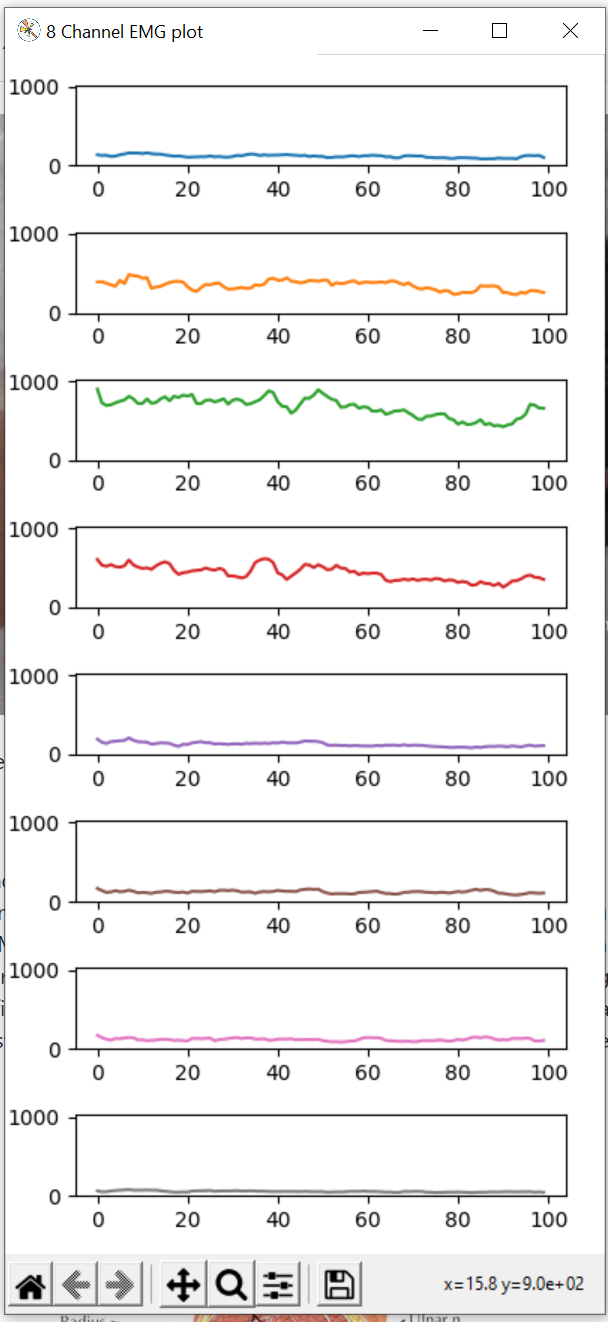

In [6]:
df.describe()

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8
count,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000
mean,87.179036,84.201823,153.018229,68.955078,44.666667,53.369792,66.518229,59.964844
std,118.103691,49.681706,69.461941,25.695307,14.486011,22.437898,72.288309,82.084076
min,16.000000,22.000000,54.000000,29.000000,23.000000,22.000000,17.000000,16.000000
25%,27.000000,55.000000,97.000000,52.000000,37.000000,40.750000,35.000000,23.000000
50%,40.000000,72.000000,137.000000,62.000000,40.000000,50.000000,47.000000,37.000000
75%,79.000000,107.000000,193.000000,78.000000,45.000000,59.000000,70.000000,61.000000
max,951.000000,416.000000,450.000000,237.000000,129.000000,239.000000,664.000000,745.000000


[Text(0.5, 1.0, 'sEMG and Finger corrolations')]

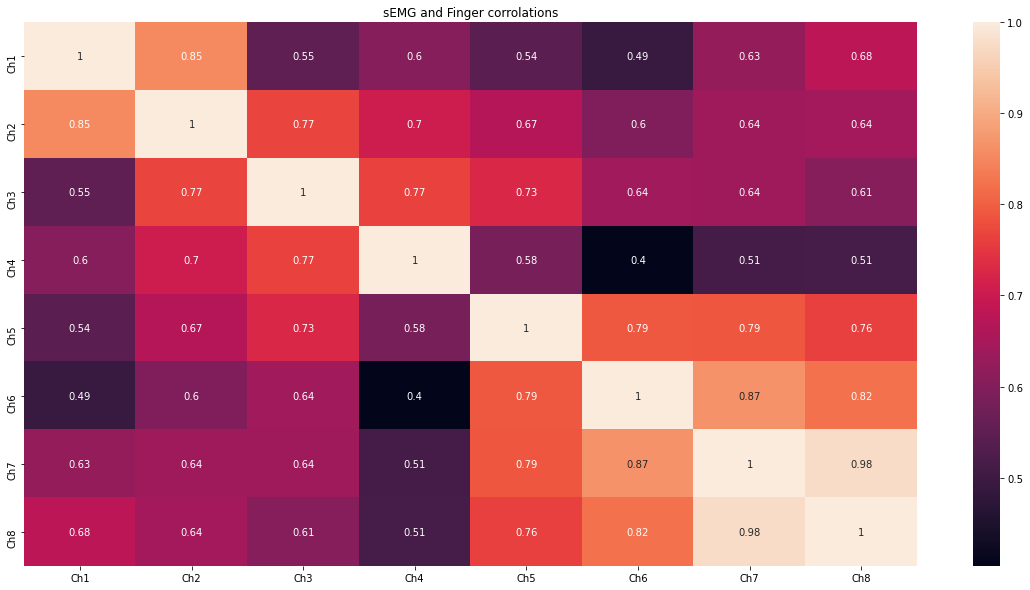

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(df.corr(), annot=True).set(title="sEMG and Finger corrolations")

array([[<AxesSubplot:title={'center':'Ch1'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch2'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch3'}, xlabel='[Finger]'>],
       [<AxesSubplot:title={'center':'Ch4'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch5'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch6'}, xlabel='[Finger]'>],
       [<AxesSubplot:title={'center':'Ch7'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch8'}, xlabel='[Finger]'>,
        <AxesSubplot:>]], dtype=object)

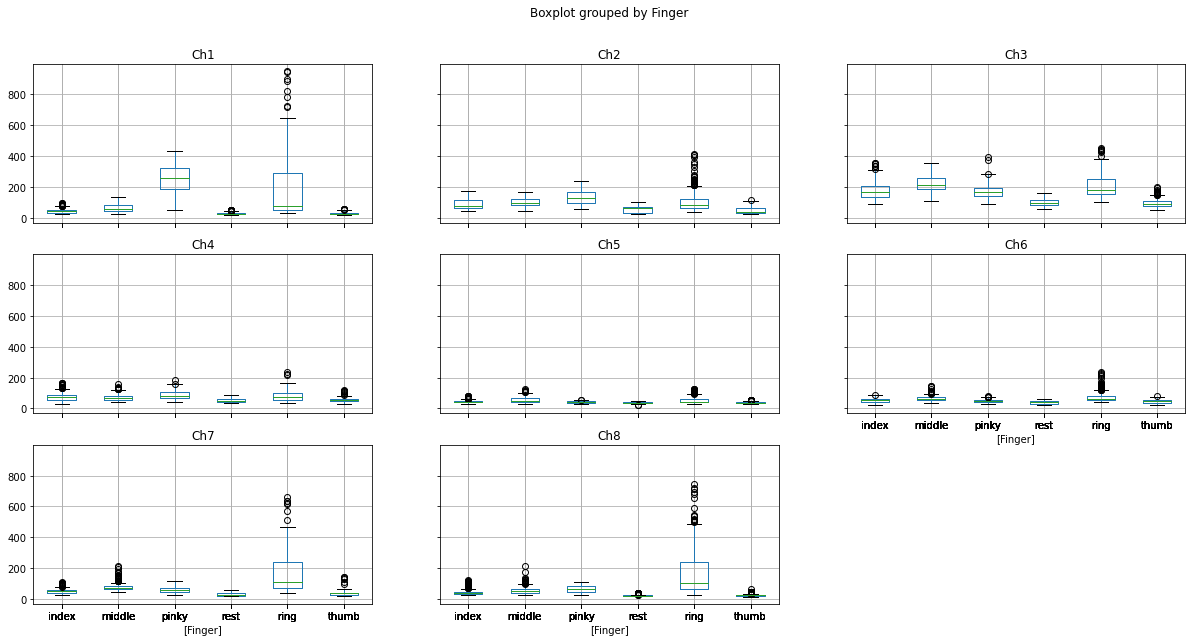

In [8]:
df.boxplot(by='Finger')

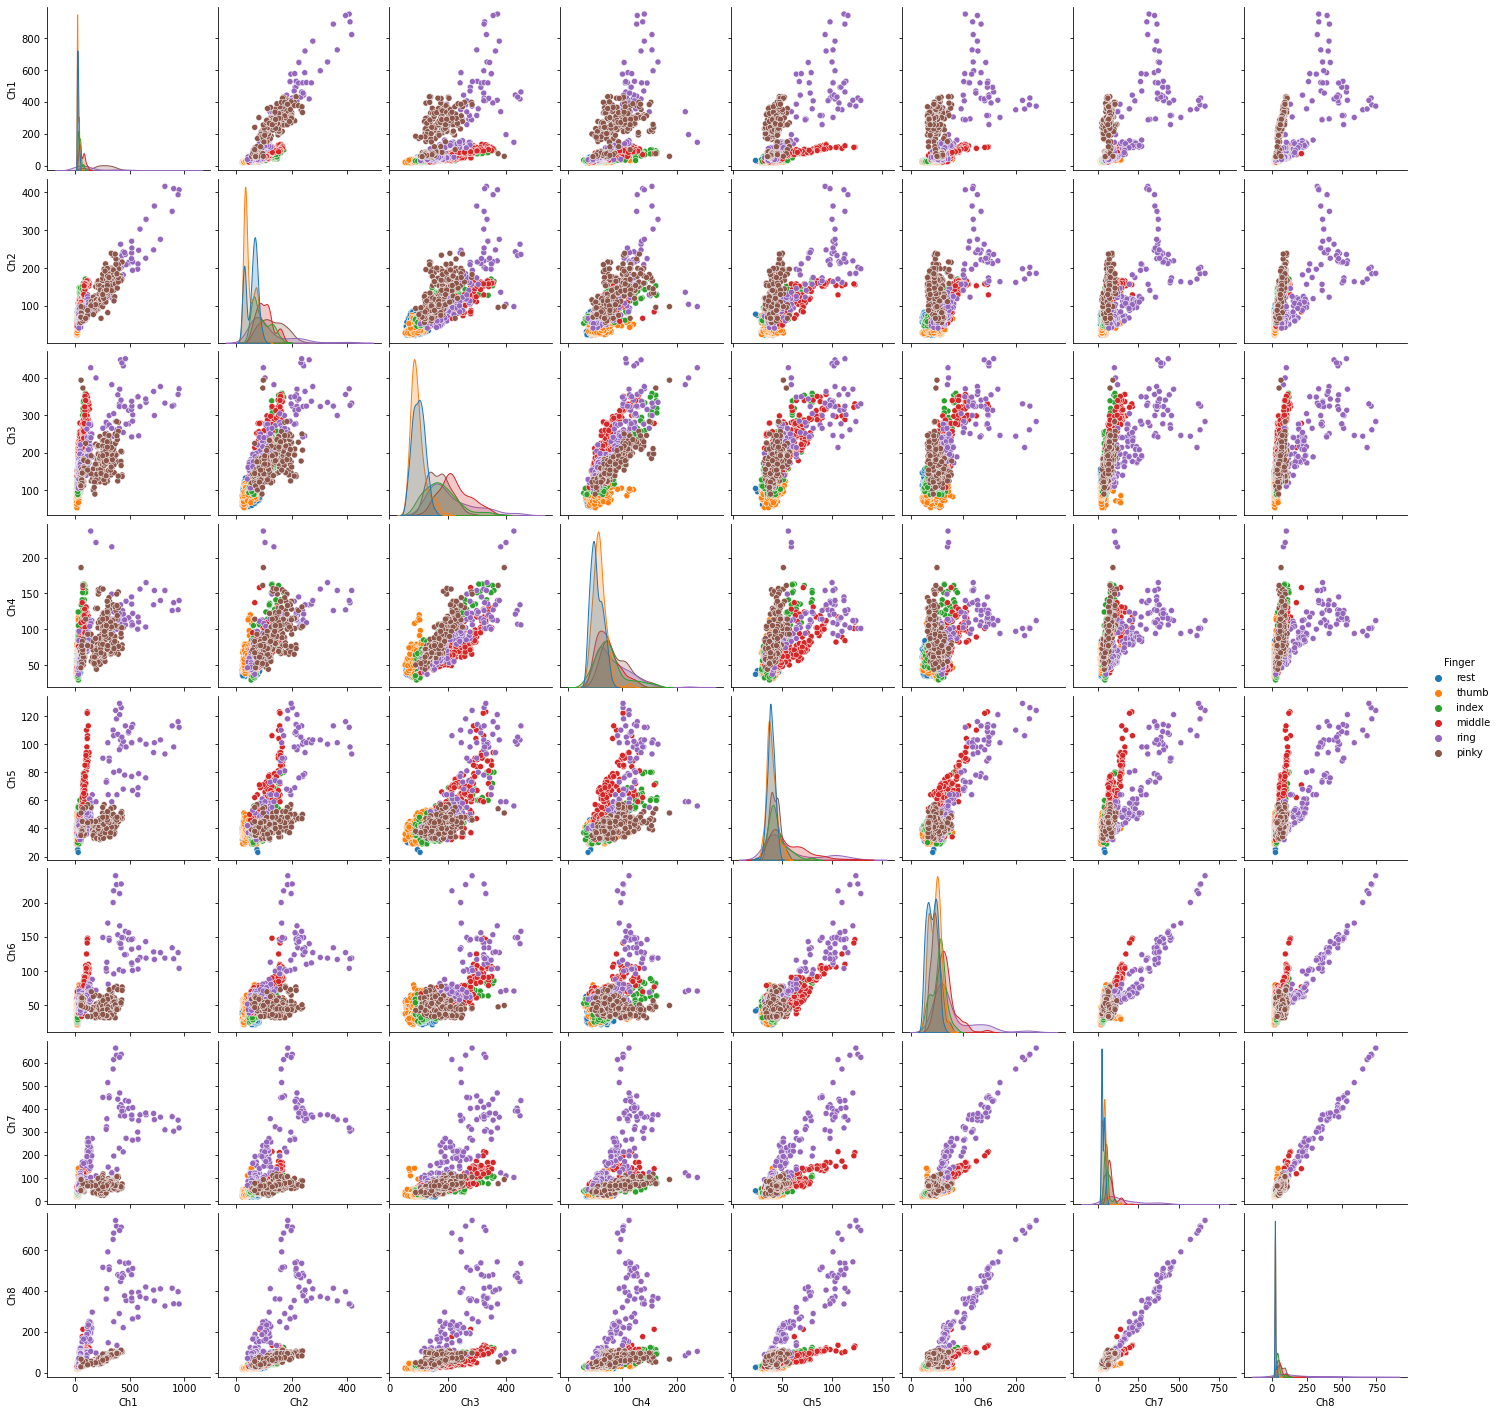

In [9]:
p=sns.pairplot(df, hue = 'Finger')

# PCA

In [10]:
from sklearn import decomposition

X = df.drop(['Finger'],1).values
X.shape

(1536, 8)

In [11]:
pca = decomposition.PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.75959451 0.13602012 0.08068002 0.00956797 0.00659759 0.00372979
 0.00241928 0.00139072]


In [12]:
X.shape

(1536, 8)

In [13]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
Xp = pca.transform(X)

print(pca.explained_variance_ratio_)

[0.75959451 0.13602012]


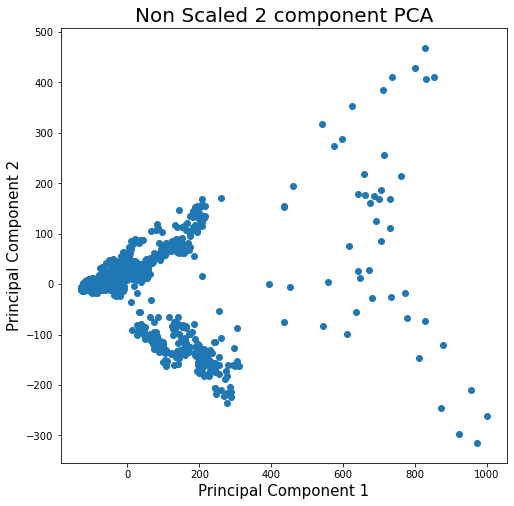

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Non Scaled 2 component PCA', fontsize = 20)
ax.scatter(Xp[:,0], Xp[:,1])

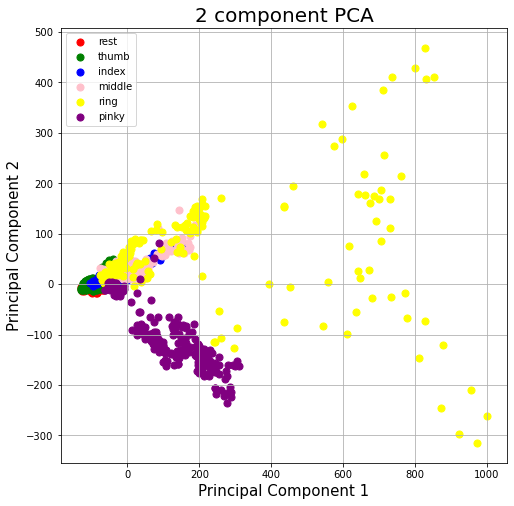

In [15]:
# Add the principal components back into a DF
principal_df = pd.DataFrame(data = Xp
             , columns = ['principal component 1', 'principal component 2'])#
# Add the labels
labelled_pca_df = pd.concat([principal_df, df[['Finger']]], axis = 1)

# Plot Setup
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
# Plot the PCA with Labels
targets = label_cols
colors = ['red', 'green', 'blue', 'pink', 'yellow', 'purple', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = labelled_pca_df['Finger'] == target
    ax.scatter(labelled_pca_df.loc[indicesToKeep, 'principal component 1']
               , labelled_pca_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Classification

As we have a dataset rebalance, I will be using the first 200 of each catagory. 

In [16]:
df['Finger'].value_counts()

thumb     346
rest      323
middle    229
pinky     219
ring      210
index     209
Name: Finger, dtype: int64

In [17]:
num = 200
# Load the relevant class data
rest  = np.fromfile(path+"vals0.dat", dtype=np.uint16).reshape((-1, 8))[:num,:]
thumb  = np.fromfile(path+"vals1.dat", dtype=np.uint16).reshape((-1, 8))[:num,:]
index  = np.fromfile(path+"vals2.dat", dtype=np.uint16).reshape((-1, 8))[:num,:]
middle = np.fromfile(path+"vals3.dat", dtype=np.uint16).reshape((-1, 8))[:num,:]
ring   = np.fromfile(path+"vals4.dat", dtype=np.uint16).reshape((-1, 8))[:num,:]
pinky  = np.fromfile(path+"vals5.dat", dtype=np.uint16).reshape((-1, 8))[:num,:]
# Make sure to change this if you use a different labelling convention
data = [rest, thumb, index, middle, ring, pinky]
label_cols = ['rest', 'thumb', 'index', 'middle', 'ring', 'pinky']

# Combine simple_classifiers numpy files into one csv
df = pd.DataFrame(np.vstack(data))

# Adding labels
# Adding labels
labelled_data = []
for i in range(len(data)):
    a = data[i]
    labels_col = np.ones((a.shape[0], 1), dtype=a.dtype)*i
    b = np.hstack((a, labels_col))
    labelled_data.append(b)
    
cols = ["Ch1","Ch2","Ch3","Ch4","Ch5", "Ch6", "Ch7", "Ch8", "Finger"]
df = pd.DataFrame(np.vstack(labelled_data), columns=cols)
# Replacing numerical fingernames with str
df['Finger'] = df['Finger'].apply(lambda x: label_cols[x])

df['Finger'].value_counts()

rest      200
index     200
thumb     200
ring      200
middle    200
pinky     200
Name: Finger, dtype: int64

## Test Train Split

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(['Finger'],1).values
y = df['Finger']

# split data into train and test sets
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

## k-NN

In [20]:
df['Finger'].value_counts()

rest      200
index     200
thumb     200
ring      200
middle    200
pinky     200
Name: Finger, dtype: int64

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(6)
knn.fit(X_train,y_train)

print("Training: ", knn.score(X_train,y_train))
print("Test: ", knn.score(X_test,y_test))

Training:  0.9214285714285714
Test:  0.8944444444444445


In [22]:
hnd_emg = np.array([0,0,0,0,0,0,0,0])
knn.kneighbors(hnd_emg.reshape(1,-1))

(array([[101.36074191, 109.        , 111.74972036, 112.11155159,
         112.5566524 , 113.35784049]]),
 array([[353,  92, 559, 688, 808, 434]], dtype=int64))

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

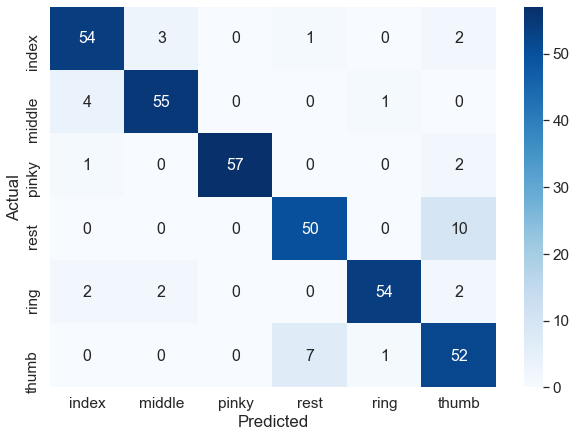

In [23]:
y_pred = knn.predict(X_test)
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

C:\Users\Peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


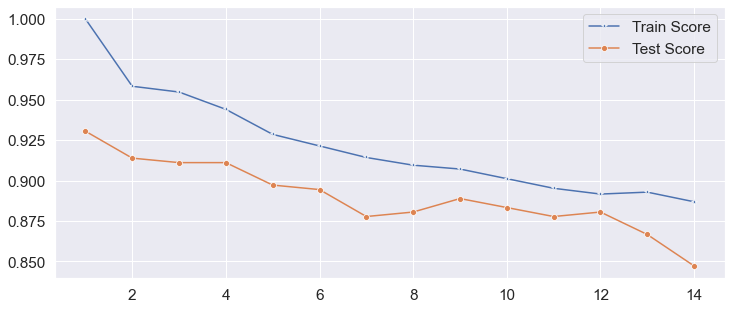

In [24]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

## SVM

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [26]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7972222222222223

In [27]:
examp = np.array([0,0,0,0,0,0,0,0]).reshape(1,-1)
clf.predict(examp)

array(['index'], dtype=object)

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
print(clf.score(X_test, y_test))

C:\Users\Peter\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8111111111111111

## Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB 

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.5722222222222222

## Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
clf = make_pipeline( DecisionTreeClassifier())
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8277777777777777

## XGBoost

In [39]:
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

y_pred
#predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\Peter\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 93.33%


In [ ]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [ ]:
from xgboost import plot_importance

# plot
plot_importance(model)

In [ ]:
ch = 5
channel = "Ch" + str(ch)
fig, ax = plt.subplots()

colors = {'rest':'pink', 'thumb':'red', 'index':'green', 'middle':'blue', 'ring':'orange', 'pinky':'purple'}
ax.scatter(df.index, df[channel], c=df['Finger'].map(colors))
ax.legend()
ax.set_title("Finger Movement by " + channel)
ax.set_ylabel(channel)
plt.show()